## Project 2 Ames Housing

### Problem Statement

The problem statement of this project is to find a model to predict housing prices in Ames, IA and to identify key features to help house owners and buyers in their decision to purchase or sell their houses

### Feature Elimination and Modelling

In this second part of the project, I have done feature engineering/elimination, created and evaluated a few models and finally come to a decision of which model to select the key features. Subsequently, I updated the model on the entire training dataset and used this model to predict housing prices in the test dataset.

1.  Data preparation
> - Read in the cleaned datas which I have done in EDA and Cleaning Data.
2. Creating More Features
> - In this steps, I use sklearn.preprocessing package, PolynomialFeatures to create more features with higher order terms. In this case, I use a degree of 2. This resulted in having a dataset with a total of 1592 columns/features to explore later.
3. Create a model using Linear Regression for all (1592) features
> - Before instantiating Linear Regression, I used the train_test_split package from sklearn to split my training datasets into training and test subset, After which, I scaled the data using StandardScaler function because of the varying scale of our data. 
> - Create a model using Linear Regression
> - Evalute the model using the metrics score $R^2$ and Mean Squared Error (MSE)
> - Evalue the model using a baseline by using the mean of the training data subset and evalute the scores against these baseline scores.
> - Evaluate the model using the Linearity test, Independence test, Normality of residuals test and equal variance of the residual.
4. Selection of features using pipeline and GridSearch
> - Use 2 different techniques - SelectKBest and recursive feature elimination (RFE) to select the best 20 features from each technique
> - Consolidate the 20 best features from each technique into a list and removing duplicated feature.
> - Use correlation with the Sale Price (Y-variable) to futher select 10 best features for further modelling
5. Additional Modelling using the 10 best features
> - Before modelling, I use StandardScaler to scale the data of the 10 best features
> - Created 3 models using Linear Regression, Lasso and Ridge Regularization
> - Evaluated the 3 models using using the metrics score $R^2$ and Mean Squared Error (MSE)
6. Further evaluation of the best model using the 10 best features
> - Evalute the model using the metrics score $R^2$ and Mean Squared Error (MSE), stats_model API - OLS
> - Evaluate the model using the Linearity test, Independence test, Normality of residuals test and equal variance of the residual.
> - The evaluation of the model shows that it passes all the tests except that there is strong multicollinearity issue.
> - I decided to create another model using 10 features but not selecting duplicated features to try to eliminate strong multicollinearity
7. Create another model - Linear Regression Model_v1 using another 10 distinct features
> - Evalute the model using the metrics score $R^2$ and Mean Squared Error (MSE), stats_model API - OLS
> - Multicollinearity Issue still remains despite selecting 10 distinct features.
8. Decision on Final Model to be used and predicting test dataset
> - Final model to be used is Linear Regressio Model with 10 best selected features
> - Dropping the features in entire training dataset to the 10 best selected features
> - Update the model on the entire training dataset
> - Use StandardScaler to scale the entire training dataset
> - Make predictions on test dataset using the updated model.
> - Save the predictions into a csv file.

### Summary of my findings - 

**Analysis of the first Linear Regression Model with all 1592 features**

Based on the MSE and  𝑅2  score, my model is performing far worse on the test subset than on the training set and it is very clear that the model is overfit to the data.

This is expected as there are many features used (about 1500 features) and from these features, it was explored during data cleaning and EDA for just 70 features, there is multicollinearity issue. Furthermore, quite a number of features do not have a linear relationship with the sale prices.



**Analysis of the Linear Regression Model with 10 best features**

Based on the evaluation charts and OLS summary, the evaluation of the model is as follows -

The MSE and 𝑅2 score for Linear Regression (10 selected features) is the best as compared to lasso and ridge regulatization. This is likely because of the feature elimination techniques I have used to further select the recommended features.
The 10 selected features have a linear relationship with the target variable - Sale Price.
There seems to be a strong multicollinearity between the features - My analysis is that there are 2 prominent features which have strong correlation with sale price - over_qual and gr_liv_area based on these 2 appearing in the polynomial features. Hence, these features have the effect from gr_liv_area and over_qual which could have led to strong multicollinearity

Normality of the residuals (errors) - Histogram seems to show that it is normally distributed

Variance of the residuals (errors) seem to show that it is equal. Though, there seem to be some anomalies for test subset model - which probably require further work to fine tune.

As mentioned above, the model seems to have strong multicollinearity issue and despite creating another model with 10 distinct features, i cant seem to eliminate the multicollinearity issue and i believe that it is because many housing characteristics are related in one way. For example, a larger house is likely to have more bedrooms than a smaller one.


#### Key Features from the Model which will affect Housing Prices

The recommended model incorporated the following key features which affect the housing price and hence shall be used to predict housing prices in Ames, IA:

- Overall Quality of the house (Strong Variable)
- Gr Living Area (Strong Variable) - Above grade (ground) living area square feet
- Kitchen Quality
- Garage Cars - Size of garage in car capacity
- Garage Area - Size of garage in square feet
- Bstm Qual - Refers to the height of the basement
- 1st Flr SF - First Floor Square Feet


### References

- https://stackoverflow.com/questions/26097916/convert-pandas-series-to-dataframe
- https://www.blog.pythonlibrary.org/2018/03/13/python-3-an-intro-to-f-strings/
- https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
- https://stackoverflow.com/questions/31029340/how-to-adjust-scaled-scikit-learn-logicistic-regression-coeffs-to-score-a-non-sc
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
- https://towardsdatascience.com/feature-engineering-for-numerical-data-e20167ec18
- https://towardsdatascience.com/5-feature-selection-method-from-scikit-learn-you-should-know-ed4d116e4172
- https://stackoverflow.com/questions/54067474/comparing-results-from-standardscaler-vs-normalizer-in-linear-regression

### Import Libraries

In [1]:
# Imports:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.feature_selection import RFE, SelectKBest
from sklearn import metrics

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression, RFE

from scipy import stats
import statsmodels.api as sm

from itertools import combinations

%matplotlib inline

# Set the graph style
sns.set_style('whitegrid')

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# function to print stats_model OLS summary
def view_lr_summary(X,y):    
    # Use stats models to generate a summary of the regression
    # Copy the X and y and reset index of y to be equal to x
    X1 = X.copy()
    y1 = y.copy()
    y1.index = X1.index
    X1 = sm.add_constant(X1)
    model = sm.OLS(y1, X1)
    results =  model.fit()
    # return the results
    return results.summary()
    
# function to create boxplot for ordinal features, scatterplot for numerical features and histogram
def eval_feat(df, col, figsize):
    # list of ordinal features
    boxplot_list = ['over_qual kit_qual', 'over_qual ext_qual', 'over_qual^2', 'over_qual garg_cars']
    
    # You'll want to specify your figsize
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize = figsize)
    
    #determine if boxplot or scatterplot will be called out
    if col in boxplot_list:
        # Plot the boxplot
        ax[0] = sns.boxplot(df[col],  y=y_train['sale_price'], ax = ax[0])
        ax[0].set_title('Boxplot of ' + col.capitalize() + " vs Sale Price", fontsize = 14)
        ax[0].set_xlabel(col, fontsize = 12)
        ax[0].set_ylabel("Sale Price", fontsize = 12)
    
    else:
        # Plot the scatterplot
        ax[0] = sns.scatterplot(x=df[col], y=y_train['sale_price'], ax = ax[0])
        ax[0].set_title('Scatterplot of ' + col.capitalize() + " vs Sale Price", fontsize = 14)
        ax[0].set_xlabel(col,fontsize = 12)
        ax[0].set_ylabel("Sale Price",fontsize = 12)
          
    # Plot the histogram
    ax[1] = sns.distplot(df[col], ax = ax[1])
    ax[1].set_title('Histogram of ' + col.capitalize(), fontsize = 14)
    ax[1].set_xlabel(col, fontsize = 12)
    ax[1].set_ylabel("Probability Density", fontsize = 12)

# function to evaluate the model
def eval_model(y_act, y_pred):
    
    # Make a copy of the y_act dataframe
    df = y_act.copy()
    # Copy y_pred into the data frame
    try:
        df['pred'] = [x[0] for x in y_pred]
    except:
        df['pred'] = [x for x in y_pred]
    
    df.columns=['act','pred']
    # create residuals
    df['res'] = df['act'] - df['pred']
    # get the r2 score
    r2 = metrics.r2_score(df['act'], df['pred'])
    # get the MSE score
    mse = metrics.mean_squared_error(df['act'], df['pred'])
    # do the normality test on the residuals
    k2, p = stats.normaltest(df['res'])
    
    # specify your figsize and the number of plots on that figure
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (15,12))

    fig.suptitle('Model analysis', fontsize = 16)
    
    # Plot the scatter of the predicted versus actual
    ax[0][0] = sns.scatterplot('act','pred', data=df, ax = ax[0][0])
    ax[0][0] = sns.lineplot('act','act', data=df, ax = ax[0][0], color = 'grey')
    ax[0][0].set_title('Predicted versus actuals', fontsize = 14)
    ax[0][0].set_xlabel('Actuals', fontsize = 12)
    ax[0][0].set_ylabel('Predicted', fontsize = 12)
    ax[0][0].text(.25, .75, f"$R^2$ {r2:.4}\n$MSE$ {mse:.4}", horizontalalignment='left',
                  size='large', color='grey', weight='semibold', transform=ax[0][0].transAxes)
    ax[0][0].grid(False)
    
    # Plot the scatter of the residuals versus actuals
    ax[0][1] = sns.scatterplot(x = 'act',y = 'res', data=df, ax = ax[0][1])
    ax[0][1].set_title('Residuals versus actuals', fontsize = 14)
    ax[0][1].set_xlabel('Actuals', fontsize = 12)
    ax[0][1].set_ylabel('Residuals', fontsize = 12)
    ax[0][1].axhline(y=0, color = 'grey')
    ax[0][1].grid(False)
    
    # Plot the residuals
    ax[1][0] = sns.scatterplot(x = df.index,y = 'res', data=df, ax = ax[1][0])
    ax[1][0].set_title('Residuals versus an index', fontsize = 14)
    ax[1][0].set_xlabel('Index', fontsize = 12)
    ax[1][0].set_ylabel('Residuals', fontsize = 12)
    ax[1][0].axhline(y=0, color = 'grey')
    ax[1][0].grid(False)
    
    # Plot the histogram of residuals
    ax[1][1] = sns.distplot( df['res'], ax = ax[1][1])
    ax[1][1].set_title('Histogram of residuals', fontsize = 14)
    ax[1][1].set_xlabel('Residuals', fontsize = 12)
    ax[1][1].set_ylabel('Distribution', fontsize = 12)
    ax[1][1].text(.05,.95, f"p value for $H_0$: residuals are normal is {p:.4}", 
                  horizontalalignment='left', size='large', color='grey', weight='semibold', 
                  transform=ax[1][1].transAxes)
    ax[1][1].grid(False)
    
    # https://stackoverflow.com/questions/26097916/convert-pandas-series-to-dataframe
    # https://www.blog.pythonlibrary.org/2018/03/13/python-3-an-intro-to-f-strings/
    # https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

### Read the Clean Data

In [3]:
# Set relative data path
data_path = "../datasets"
test_dataframe = "test_clean.csv"
train_dataframe = "train_clean.csv"
y_train_dataframe = "y_clean.csv"

# read the individual files
X_train = pd.read_csv(os.path.join(data_path, train_dataframe))
X_test = pd.read_csv(os.path.join(data_path, test_dataframe))
y_train = pd.read_csv(os.path.join(data_path, y_train_dataframe))

# using the print function to check for the numbers of rows and columns for the individual dataframe
print(X_train.shape, X_test.shape, y_train.shape)

(2049, 214) (878, 214) (2049, 1)


In [4]:
# Establish the list of features
cat_features = ['ms_subclass', 'ms_zoning', 'lot_config', 'neigh', 'bld_type', 'hs_style', 
                 'cen_air', 'garag_type','sale_type', 'street', 'land_cont', 'cond1', 'cond2',
                'roof_style', 'roof_matl','ext_1st', 'ext_2nd', 'mas_vnr_type', 'found',
                'bsmt_exp','heating','electrical']

num_features = ['lot_area', 'over_qual', 'over_cond', 'tot_bsmt_sf', 'gr_liv_area', 'bsmt_full_bath',
                'bsmt_half_bath', 'full_bath', 'half_bath', 'bed_abvgr',
                'enc_porch', 'mon_sold', 'yr_sold', 'lot_front','mas_vnr_area', 'bsmt_fin_sf',
                'bsmt_fin_sf_2','bsmt_unf_sf','low_qual_fin_sf','kitch_abv_gr','tot_rms_abv_grd',
                'fireplcs','garg_yr_blt','garg_cars', 'garg_area','wood_dck_sf', 'opn_prch_sf',
                '3sn_prch', 'scrn_prch', 'pool_area','misc_val','1st_flr_sf', '2nd_flr_sf', 'lot_shape',
                'util', 'land_slop', 'ext_qual', 'ext_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_fin_type_1',
                'bsmt_fin_type_2', 'heat_qc', 'kit_qual', 'funct', 'fireplc_qu', 
                'garg_fnsh','garg_qlty','garg_cnd','pvd_drive', 'age_home_at_sale','age_remodel_at_sale']

### Use polynomial features to create more features with high order terms

In [5]:
# Consider only interaction terms of the numerical columns
# Instantiate PolynomialFeatures
poly = PolynomialFeatures(degree = 2, include_bias = False)

# Fit and transform the training dataset
X_train_p = pd.DataFrame(poly.fit_transform(X_train[num_features]))
X_train_p.columns = poly.get_feature_names(num_features)

# Fit and transform the test dataset
X_test_p = pd.DataFrame(poly.fit_transform(X_test[num_features]))
X_test_p.columns = poly.get_feature_names(num_features)

In [6]:
# using the print function to check if PolynomialFeatures works properly
print(X_train_p.shape)
print(X_test_p.shape)
print(X_train_p.head())

(2049, 1430)
(878, 1430)
   lot_area  over_qual  over_cond  tot_bsmt_sf  gr_liv_area  bsmt_full_bath  \
0   13517.0        6.0        8.0        725.0       1479.0             0.0   
1   11492.0        7.0        5.0        913.0       2122.0             1.0   
2    7922.0        5.0        7.0       1057.0       1057.0             1.0   
3    9802.0        5.0        5.0        384.0       1444.0             0.0   
4   14235.0        6.0        8.0        676.0       1445.0             0.0   

   bsmt_half_bath  full_bath  half_bath  bed_abvgr  ...  garg_cnd^2  \
0             0.0        2.0        1.0        3.0  ...         9.0   
1             0.0        2.0        1.0        4.0  ...         9.0   
2             0.0        1.0        0.0        3.0  ...         9.0   
3             0.0        2.0        1.0        3.0  ...         9.0   
4             0.0        2.0        0.0        3.0  ...         9.0   

   garg_cnd pvd_drive  garg_cnd age_home_at_sale  \
0                 6.0

In [7]:
# Drop the initial numerical variables from the train and test datasets to produce duplicates in the next step
X_train_temp = X_train.drop(columns = num_features)
X_test_temp = X_test.drop(columns = num_features)

# recombine the polynomial transformed variables with the categorical variables
X1_train = X_train_p.join(X_train_temp)
X1_test = X_test_p.join(X_test_temp)
print(X1_train.shape)
print(X1_test.shape)

(2049, 1592)
(878, 1592)


In [8]:
print(X_train_temp.shape)
print(X_train_temp.head())

(2049, 162)
   ms_subclass_30  ms_subclass_40  ms_subclass_45  ms_subclass_50  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               1   

   ms_subclass_60  ms_subclass_70  ms_subclass_75  ms_subclass_80  \
0               1               0               0               0   
1               1               0               0               0   
2               0               0               0               0   
3               1               0               0               0   
4               0               0               0               0   

   ms_subclass_85  ms_subclass_90  ...  bsmt_exp_No  heating_GasA  \
0               0               0  ...            1             1   
1               0   

### Split the training data into training and testing subsets

In [9]:
# splitting training dataset into further subsets
X2_train, X2_test, y2_train, y2_test = train_test_split(X1_train, y_train, random_state=142)

In [10]:
# Using the print function to check the subsets after splitting the training dataset
print("X2_train : " + str(X2_train.shape))
print("X2_test : " + str(X2_test.shape))
print("y2_train : " + str(y2_train.shape))
print("y2_test : " + str(y2_test.shape))

X2_train : (1536, 1592)
X2_test : (513, 1592)
y2_train : (1536, 1)
y2_test : (513, 1)


### Scaling the data using Standard Scaler

In [11]:
# Instantiate.
ss = StandardScaler()

# Fit and transform the training subset
X2_train_sc = ss.fit_transform(X2_train)

# Transform the test subset
X2_test_sc = ss.transform(X2_test)


### Modelling using Linear Regression for all features

In [12]:
# Linear Regression without any regularisation
lr= LinearRegression()
# Fit the model
lr.fit(X2_train_sc, y2_train)

LinearRegression()

In [13]:
# Use the fitted model to predict the training subset
y2_train_preds = lr.predict(X2_train_sc)

In [14]:
# Use the fitted model to predict the test subset
y2_test_preds = lr.predict(X2_test_sc)

#### Evaluating the Linear Regression Model for all features

In [15]:
# Check the MSE on the training and test subsets
print(f'MSE on training subset: {metrics.mean_squared_error(y2_train, y2_train_preds)}')
print(f'MSE on testing subset: {metrics.mean_squared_error(y2_test, y2_test_preds)}')

MSE on training subset: 32516601.45110506
MSE on testing subset: 516083610508.57007


In [16]:
# Check the R^2 on the training and test subsets.

print(f'R^2 on training set: {metrics.r2_score(y2_train, y2_train_preds)}')
print(f'R^2 on test set: {metrics.r2_score(y2_test, y2_test_preds)}')

R^2 on training set: 0.9944496373165316
R^2 on test set: -67.80025018664716


In [17]:
# Creating baseline MSE and R^2 Models

print(f'MSE of Baseline Model: {metrics.mean_squared_error(y2_test, [np.mean(y2_train)] * len(y2_test))}')
print(f'R^2 of Baseline model: {metrics.r2_score(y2_test, [np.mean(y2_train)] * len(y2_test))}')

MSE of Baseline Model: 7581251947.186619
R^2 of Baseline model: -0.010673503427956366


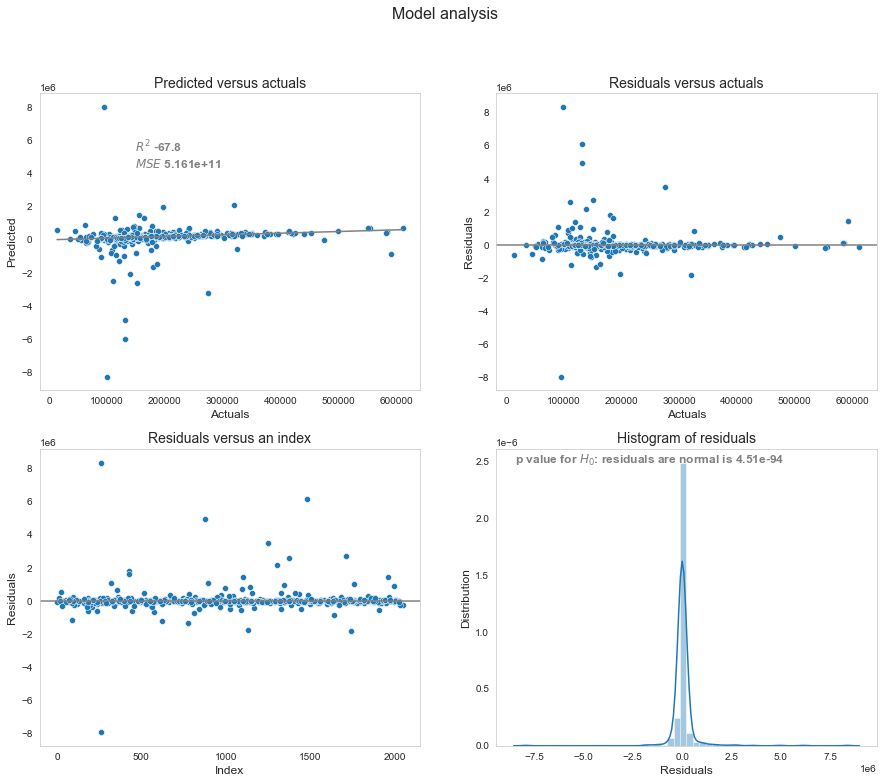

In [18]:
# Using the eval_model function create the charts to evaluate the model
eval_model(y2_test, y2_test_preds)

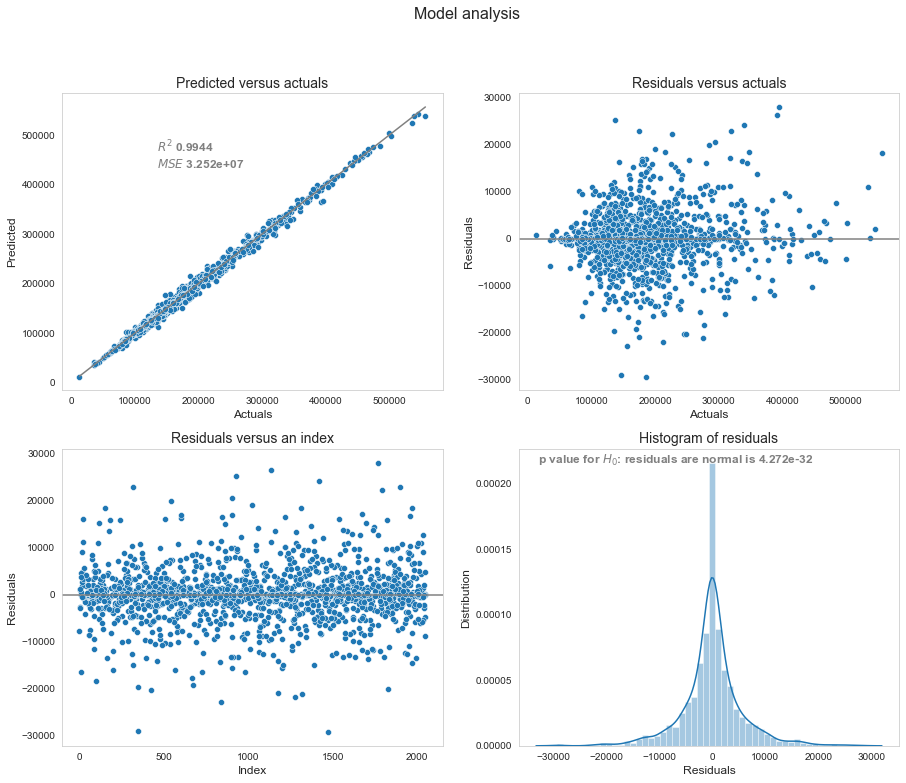

In [19]:
# Using the eval_model function create the charts to evaluate the model
eval_model(y2_train, y2_train_preds)

Based on the above model analysis as well as the MSE and $R^2$ score, my model is performing far worse on the test subset than on the training set and it is very clear that the model is overfit to the data. 

This is expected as there are many features used (about 1500 features) and from these features, it was explored during data cleaning and EDA for just 70 features, there is multicollinearity issue. Furthermore, quite a number of features do not have a linear relationship with the sale prices. 

The purpose of creating this model is to have an understanding of how this model perform with large number of features without any feature elimination and engineering. This can also serve as a baseline. 

Moving forward, I will use some features selection techniques to improve my model.

### Selection of features using pipeline and GridSearch

In [20]:
# Instantiate a pipeline
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('kbest', SelectKBest(f_regression, k = 10)),
    ('rfe', RFE(Lasso(),n_features_to_select=None))
])

In [21]:
# Define dictionary of hyperparameters.
# In this case we are calling the kbest evaluation object and 
# and Recursive Feature Elimination (RFE)

# k_best_p = [10, 20, 30, 40, 50]
# ref_p = [5, 7, 9, 11, 20, 30]

k_best_p = [10, 20, 30, 40, 50]
ref_p = [15,20,30,40]


params = {
    'kbest__k': k_best_p,
    'rfe__n_features_to_select': ref_p
}

In [22]:
# Instantiate GridSearchCV object
gs_model = GridSearchCV(pipe, params, cv=5, verbose=1)

In [23]:
# Fit the GridSearchCV object to the data
gs_model.fit(X2_train, y2_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('kbest',
                                        SelectKBest(score_func=<function f_regression at 0x0000023D544D2C10>)),
                                       ('rfe', RFE(estimator=Lasso()))]),
             param_grid={'kbest__k': [10, 20, 30, 40, 50],
                         'rfe__n_features_to_select': [15, 20, 30, 40]},
             verbose=1)

In [24]:
# Print out the best estimators.
print("Best SelectKBest Estimator: " + str(gs_model.best_estimator_.named_steps['kbest']))
print("Best RFE Estimator: " + str(gs_model.best_estimator_.named_steps['rfe']))

Best SelectKBest Estimator: SelectKBest(k=20, score_func=<function f_regression at 0x0000023D544D2C10>)
Best RFE Estimator: RFE(estimator=Lasso(), n_features_to_select=20)


In [25]:
#Using SelectKBest to get the recommended features
kbest = SelectKBest(f_regression, k=20).fit(X2_train, y2_train)
columns_kbest = kbest.get_support(indices=True)
feat_kbest = X2_train.iloc[:,columns_kbest]
feat_kbest.columns

Index(['over_qual', 'over_qual^2', 'over_qual tot_bsmt_sf',
       'over_qual gr_liv_area', 'over_qual yr_sold',
       'over_qual tot_rms_abv_grd', 'over_qual garg_cars',
       'over_qual garg_area', 'over_qual 1st_flr_sf', 'over_qual util',
       'over_qual ext_qual', 'over_qual bsmt_qual', 'over_qual kit_qual',
       'tot_bsmt_sf gr_liv_area', 'gr_liv_area garg_cars',
       'gr_liv_area garg_area', 'gr_liv_area ext_qual',
       'gr_liv_area bsmt_qual', 'gr_liv_area kit_qual', '1st_flr_sf ext_qual'],
      dtype='object')

In [26]:
#Using RFE to get the recommended features
selector_rfe = RFE(estimator=Lasso(), n_features_to_select=20, step=50)
selector_rfe.fit(X2_train, y2_train)

RFE(estimator=Lasso(), n_features_to_select=20, step=50)

In [27]:
# Getting the recommended features from RFE
columns_rfe = selector_rfe.get_support(indices=True)
feat_rfe = X2_train.iloc[:,columns_rfe]
feat_rfe.columns

Index(['over_qual', 'full_bath', 'half_bath', 'full_bath kitch_abv_gr',
       'kitch_abv_gr fireplcs', 'fireplcs ext_qual', 'ms_subclass_75',
       'ms_subclass_120', 'ms_subclass_160', 'ms_zoning_C (all)',
       'neigh_Crawfor', 'neigh_GrnHill', 'neigh_NridgHt', 'neigh_StoneBr',
       'hs_style_SLvl', 'cond1_PosA', 'cond1_PosN', 'roof_matl_WdShngl',
       'ext_1st_BrkFace', 'heating_Grav'],
      dtype='object')

In [28]:
# Store the 20 features selected by SelectKBest and append the feature recommended by RFE if not inside the features list.
features = ['over_qual', 'over_qual^2', 'over_qual tot_bsmt_sf',
       'over_qual gr_liv_area', 'over_qual yr_sold',
       'over_qual tot_rms_abv_grd', 'over_qual garg_cars',
       'over_qual garg_area', 'over_qual 1st_flr_sf', 'over_qual util',
       'over_qual ext_qual', 'over_qual bsmt_qual', 'over_qual kit_qual',
       'tot_bsmt_sf gr_liv_area', 'gr_liv_area garg_cars',
       'gr_liv_area garg_area', 'gr_liv_area ext_qual',
       'gr_liv_area bsmt_qual', 'gr_liv_area kit_qual', '1st_flr_sf ext_qual']

for feat in list(feat_rfe.columns):
    if feat not in features:
        features.append(feat)

In [29]:
# Concatenate the training subset with predictor(sale_price)
X2_train[features].shape
df = pd.concat([X2_train[features], y2_train],axis=1)
df.shape

(1536, 40)

In [30]:
# Use correlation to further select the best 10 features for modelling
print("Find most important features relative to target")
corr = df.corr()
corr.sort_values(["sale_price"], ascending = False, inplace = True)
print(corr.sale_price)

Find most important features relative to target
sale_price                   1.000000
over_qual gr_liv_area        0.872596
gr_liv_area ext_qual         0.853156
gr_liv_area kit_qual         0.841248
gr_liv_area bsmt_qual        0.840089
over_qual kit_qual           0.835628
over_qual 1st_flr_sf         0.831435
over_qual ext_qual           0.829229
over_qual^2                  0.828461
over_qual garg_cars          0.821244
over_qual garg_area          0.820615
over_qual tot_bsmt_sf        0.818852
tot_bsmt_sf gr_liv_area      0.812947
over_qual bsmt_qual          0.809016
gr_liv_area garg_cars        0.808220
gr_liv_area garg_area        0.804651
over_qual tot_rms_abv_grd    0.803546
over_qual                    0.801101
over_qual yr_sold            0.801024
over_qual util               0.800422
1st_flr_sf ext_qual          0.786883
fireplcs ext_qual            0.575414
full_bath                    0.532485
kitch_abv_gr fireplcs        0.440412
neigh_NridgHt                0.413567
fu

In [31]:
# Putting the best 10 features into a list
updated_feat = corr[1:11].index.values.tolist()
print(updated_feat)

['over_qual gr_liv_area', 'gr_liv_area ext_qual', 'gr_liv_area kit_qual', 'gr_liv_area bsmt_qual', 'over_qual kit_qual', 'over_qual 1st_flr_sf', 'over_qual ext_qual', 'over_qual^2', 'over_qual garg_cars', 'over_qual garg_area']


### Modelling Linear Regression using 10 best features

In [32]:
# Eliminating all features except for the 10 selected features
X3_train = X2_train[updated_feat]
X3_test = X2_test[updated_feat]
print(X3_train.shape, X3_test.shape)

(1536, 10) (513, 10)


In [33]:
# Instantiate.
ss1 = StandardScaler()

# Fit and transform the training subset of the 10 selected features
X3_train_sc = ss1.fit_transform(X3_train)

# Transform the testing subsets of the 10 selected features
X3_test_sc = ss1.transform(X3_test)


In [34]:
# Instantiate Linear Regression
lr_1 = LinearRegression()
lr_1.fit(X3_train_sc, y2_train)

LinearRegression()

In [35]:
# Predicting using training subset
y3_train_preds = lr_1.predict(X3_train_sc)

In [36]:
# Predicting using test subset
y3_test_preds = lr_1.predict(X3_test_sc)

In [37]:
# Check the MSE on the training and test subsets
print(f'MSE on training subset: {metrics.mean_squared_error(y2_train, y3_train_preds)}')
print(f'MSE on testing subset: {metrics.mean_squared_error(y2_test, y3_test_preds)}')

MSE on training subset: 736016192.6829993
MSE on testing subset: 887692664.221189


In [38]:
# Check the R^2 on the training and test subsets
print(f'R^2 on training subset: {metrics.r2_score(y2_train, y3_train_preds)}')
print(f'R^2 on testing subset: {metrics.r2_score(y2_test, y3_test_preds)}')

R^2 on training subset: 0.8743670424340293
R^2 on testing subset: 0.8816597230687391


### Modelling Linear Regression with Ridge Regularization using 10 best features

In [39]:
# Ridge regression - finding the optimal alpha
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X3_train_sc, y2_train)

print(optimal_ridge.alpha_)

18.041864093920726


In [40]:
# Fitting Ridge regression with the optimal alpha value
ridge = Ridge(alpha=optimal_ridge.alpha_)

# Checking the scores from CV
ridge_scores = cross_val_score(ridge, X3_train_sc, y2_train, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

# Fit the ridge regression model
ridge.fit(X3_train_sc, y2_train)

[0.8596506  0.91491805 0.89414679 0.86477858 0.82695415 0.86874422
 0.90744888 0.82378125 0.85773407 0.87308737]
0.8691243957776011


Ridge(alpha=18.041864093920726)

In [41]:
# Predicting using training subset
y3_train_rdg = ridge.predict(X3_train_sc)

In [42]:
# Predicting using test subset
y3_test_rdg = ridge.predict(X3_test_sc)

In [43]:
# Check the MSE on the training and test subsets
print(f'MSE on training subset: {metrics.mean_squared_error(y2_train, y3_train_rdg)}')
print(f'MSE on testing subset: {metrics.mean_squared_error(y2_test, y3_test_rdg)}')

MSE on training subset: 736524274.7123419
MSE on testing subset: 897228889.5025659


In [44]:
# Check the R^2 on the training and test subsets
print(f'R^2 on training subset: {metrics.r2_score(y2_train, y3_train_rdg)}')
print(f'R^2 on testing subset: {metrics.r2_score(y2_test, y3_test_rdg)}')

R^2 on training subset: 0.8742803162876931
R^2 on testing subset: 0.8803884277362862


### Modelling Linear Regression with Lasso Regularization using 10 best features

In [45]:
# Lasso regression - finding the optimal alpha
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X3_train_sc, y2_train)

print (optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

204.96478877676302


...................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.4s finished


In [46]:
# Fitting lasso regression with the optimal alpha value
lasso = Lasso(alpha=optimal_lasso.alpha_)

# Checking the scores from CV
lasso_scores = cross_val_score(lasso, X3_train_sc, y2_train, cv=10)

print (lasso_scores)
print (np.mean(lasso_scores))

# Fit the lasso regression model
lasso.fit(X3_train_sc, y2_train)

[0.85977711 0.91442976 0.89404655 0.86448598 0.82679914 0.86938857
 0.90695534 0.82270317 0.85782303 0.87320659]
0.8689615238667378


Lasso(alpha=204.96478877676302)

In [47]:
# Predicting using training subset
y3_train_lasso = lasso.predict(X3_train_sc)

In [48]:
# Predicting using test subset
y3_test_lasso = lasso.predict(X3_test_sc)

In [49]:
# Check the MSE on the training and test subsets
print(f'MSE on training subset: {metrics.mean_squared_error(y2_train, y3_train_lasso)}')
print(f'MSE on testing subset: {metrics.mean_squared_error(y2_test, y3_test_lasso)}')

MSE on training subset: 737765683.9484562
MSE on testing subset: 900772634.4627196


In [50]:
# Check the R^2 on the training and test subsets
print(f'R^2 on training subset: {metrics.r2_score(y2_train, y3_train_lasso)}')
print(f'R^2 on testing subset: {metrics.r2_score(y2_test, y3_test_lasso)}')

R^2 on training subset: 0.8740684161753951
R^2 on testing subset: 0.8799160032397672


### Summary Table of the Models and their scores

| **Model**  | **MSE Score - Training Subset**  | **MSE Score - Test Subset**  | **$R^2$ Score - Training Subset** | **$R^2$ Score - Test Subset** |
|:-|:-|:-|:-|:-|
| Linear Regression (1592 features)  | 32,516,601.45 | 516,083,610,508.57 | 0.9944496373165316 | -67.80025018664716 |
| Linear Regression (10 selected features)  | 736,016,192.68  | 887,692,664.22 | 0.8743670424340293 | 0.8816597230687391 |
| Ridge Regression (10 selected features)  | 736,524,274.71 | 897,228,889.50 | 0.8742803162876931 | 0.8803884277362862|
| Lasso Regression (10 selected features)  | 737,765,683.95 | 900,772,634.46 | 0.8740684161753951 | 0.8799160032397672 |

Based on the summary table of the different models and the metrics scores of MSE and $R^2$ scores, the linear regression of the 10 selected features (best features) seem to perform the best as compared to using ridge and lasso regularization. THis is expected because I used SelectKBest as well as RFE to shortlist 20 features each and then using correlation with Sale Price to further select my best 10 features for the modelling.

In the next step, I will be evaluating the best model - Linear Regression Model (10 selected features) instead of all 3 models.

### Evaluating Linear Regression (10 selected features)

#### Evaluation of Model predictions using training subset

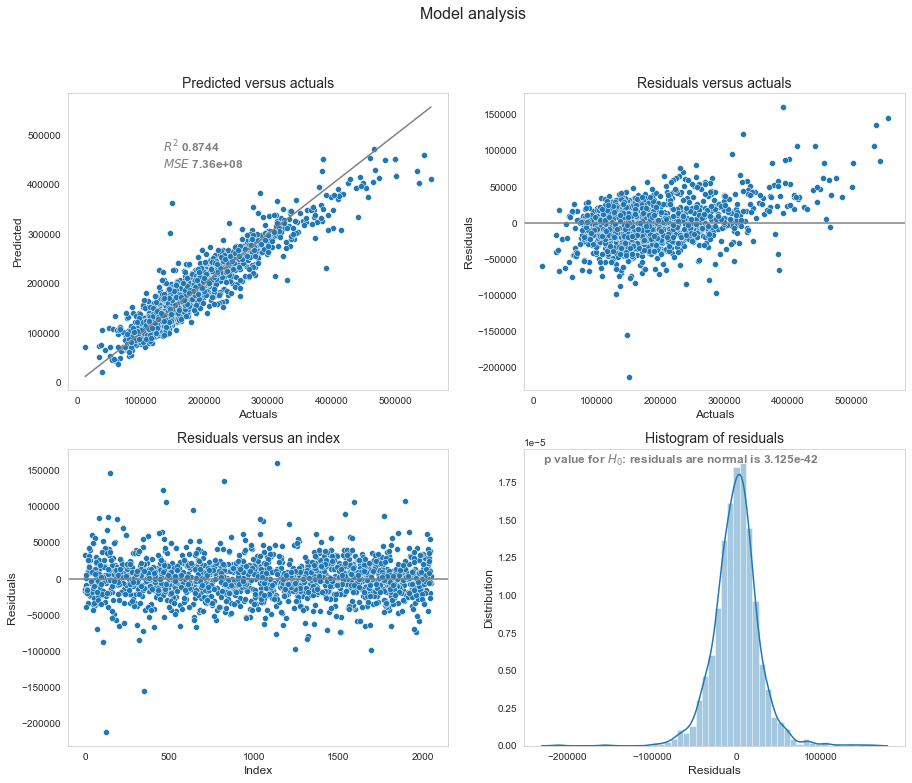

In [51]:
# Using the eval_model function create the charts to evaluate the model
eval_model(y2_train, y3_train_preds)

#### Evaluation of Model predictions using test subset

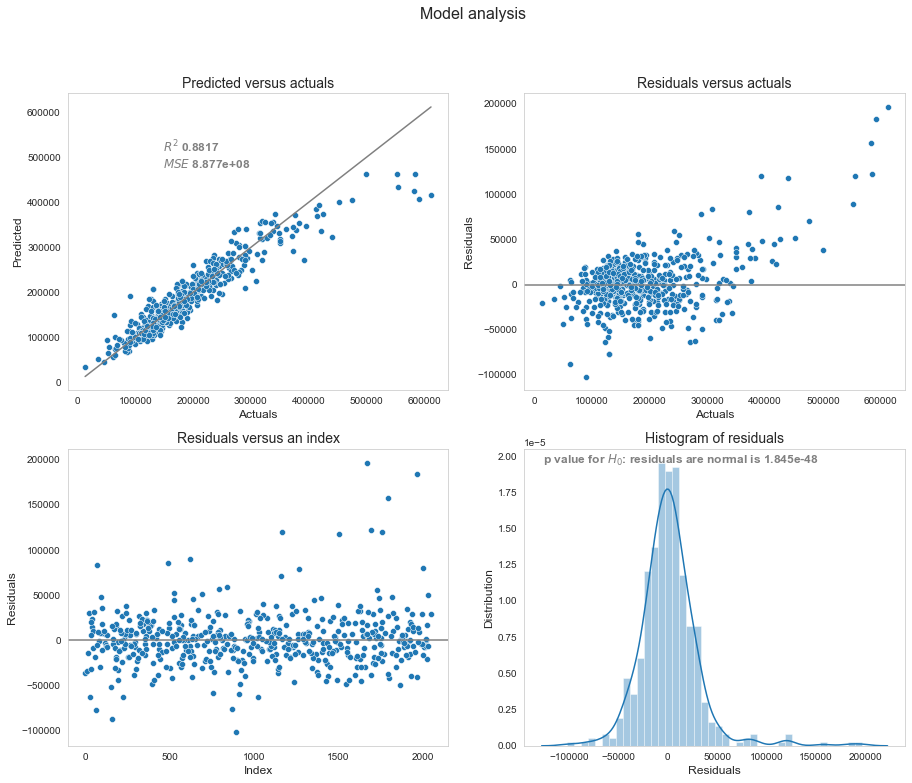

In [52]:
# Using the eval_model function create the charts to evaluate the model
eval_model(y2_test, y3_test_preds)

### Evaluation of the individual feature

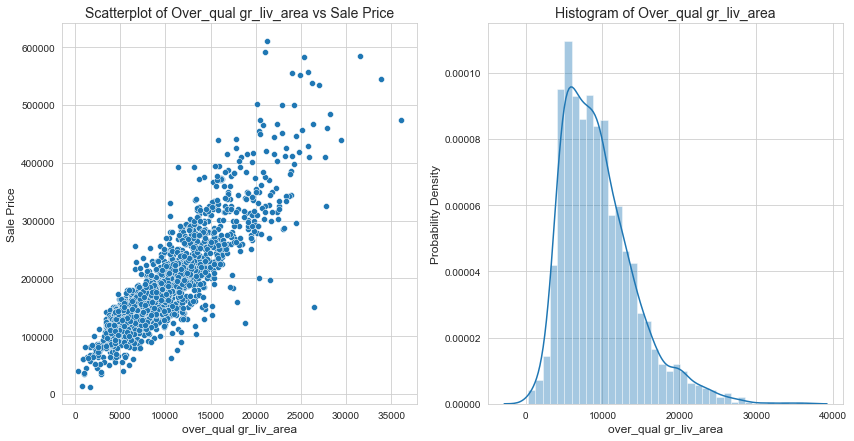

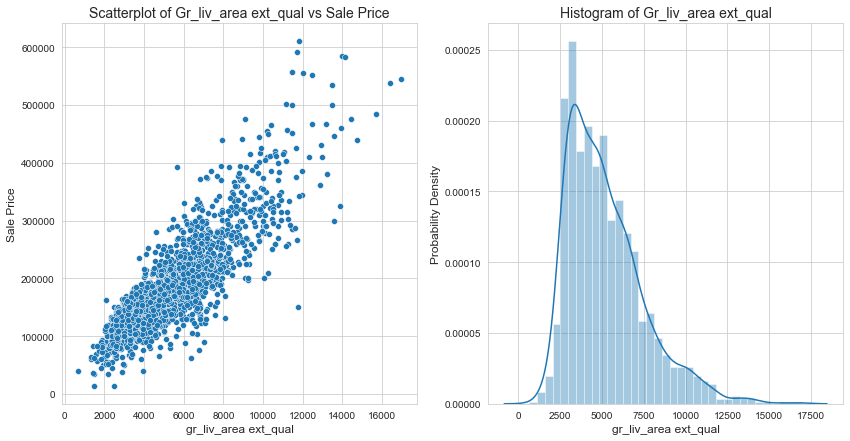

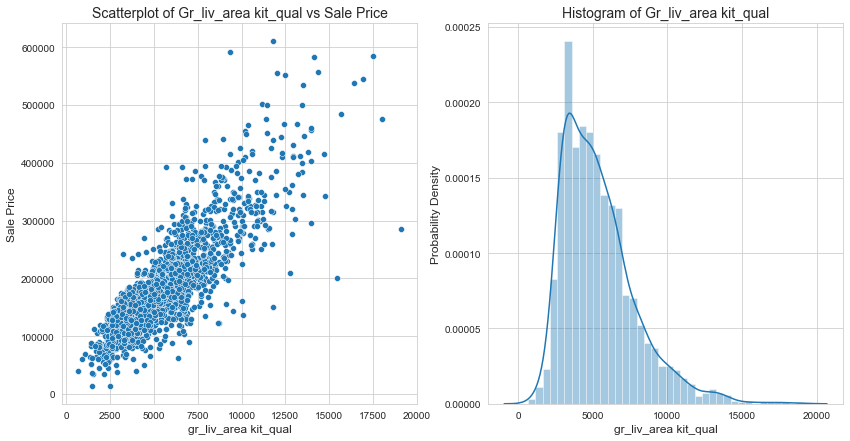

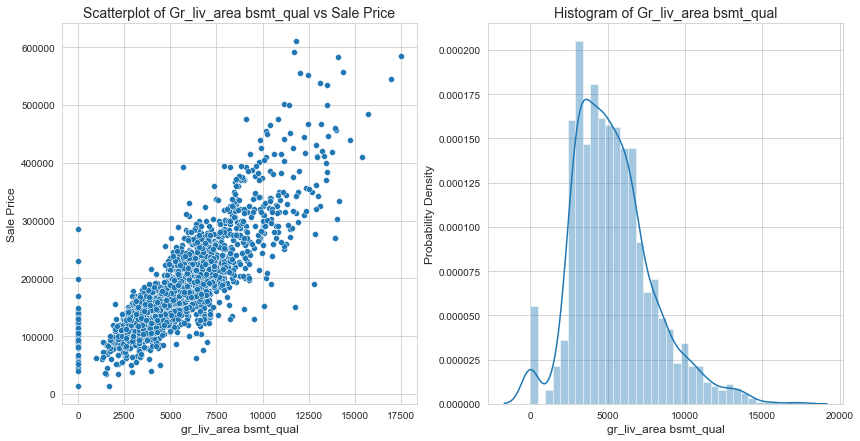

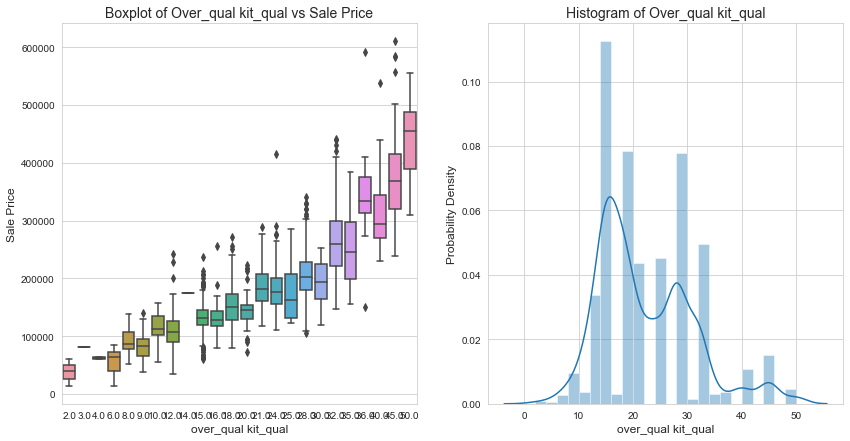

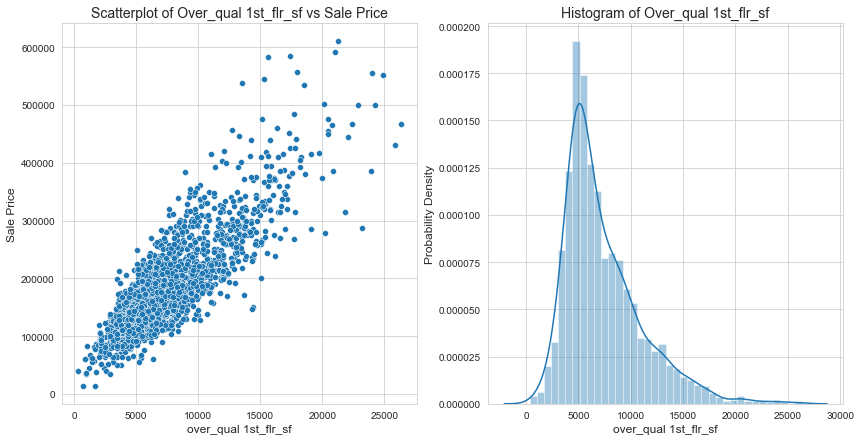

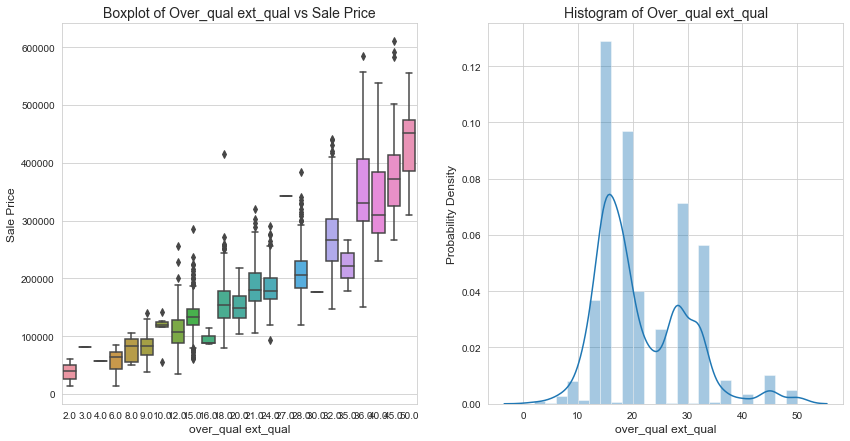

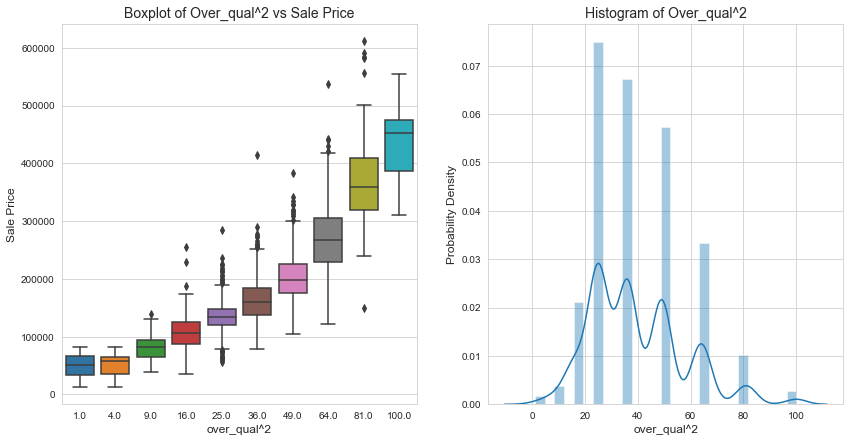

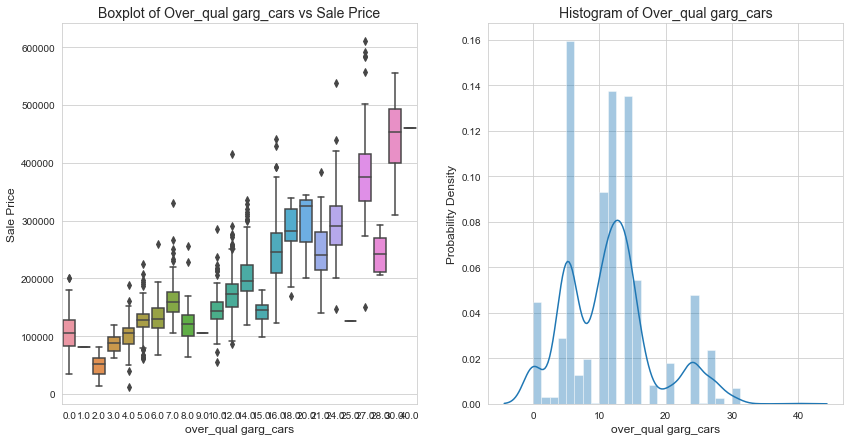

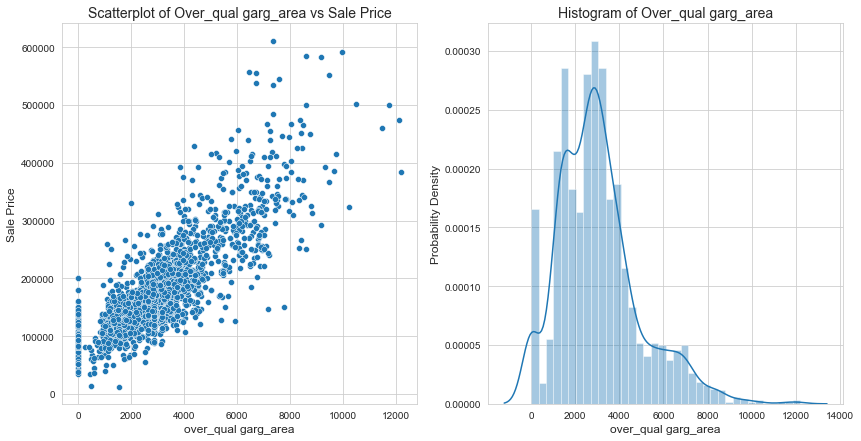

In [53]:
# using a for loop with the eval_feat to create charts for the features
for col in updated_feat:
    eval_feat(X1_train, col, (14,7))

### Getting the coefficient of the feature

In [54]:
# Printing the OLS summary results
results = view_lr_summary(X3_train, y2_train)
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1061.
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:17:47   Log-Likelihood:                -17860.
No. Observations:                1536   AIC:                         3.574e+04
Df Residuals:                    1525   BIC:                         3.580e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.153e+04   2190.535      5.263      0.000    7231.567    1.58e+04
over_qual gr_liv_area     0.1003      1.627      0.062      0.951      -3.091       3.291
gr_liv_area ext_qual      2.7163      3.752      0.724      0.469      -4.644      10.076
gr_liv_area kit_qual      4.2176      2.859      1.475      0.140      -1.390       9.825
gr_liv_area bsmt_qual     6.6784      0.665     10.042      0.000       5.374       7.983
over_qual kit_qual     1077.7027    797.707      1.351      0.177    -487.017    2642.422
over_qual 1st_flr_sf      5.5623      0.352     15.812      0.000       4.872       6.252
over_qual ext_qual      812.1752   1001.269      0.811      0.417   -1151.835    2776.186
over_qual^2            -324.6522    433.473     -0.749      0.454   -1174.919     525.614
over_qual garg_cars     725.8842    343.214      2.115      0.035      52.663    1399.105
over_qual garg_area       5.9484      1.190      4.998      0.000       3.614       8.283
==============================================================================
Omnibus:                      191.139   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1983.814
Skew:                          -0.023   Prob(JB):                         0.00
Kurtosis:                       8.567   Cond. No.                     5.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the above charts and OLS summary, the evaluation of the model is as follows -
- The MSE and $R^2$ score for Linear Regression (10 selected features) is the best as compared to lasso and ridge regulatization. This is likely because of the feature elimination techniques I have used to further select the recommended features.
- The 10 selected features have a linear relationship with the target variable - Sale Price.
- There seems to be a strong multicollinearity between the features - My analysis is that there are 2 prominent features which have strong correlation with sale price - over_qual and gr_liv_area based on these 2 appearing in the polynomial features. Hence, these features have the effect from gr_liv_area and over_qual which could have led to strong multicollinearity 
- Normality of the residuals (errors) - Histogram seems to show that it is normally distributed
- Variance of the residuals (errors) seem to show that it is equal. Though, there seem to be some anomalies for test subset model - which probably require further work to fine tune.

The recommended model incorporated the following features which affect the housing price and hence shall be used to predict housing prices in Ames, IA: 
- Overall Quality of the house (Strong Variable) 
- Gr Living Area (Strong Variable) - Above grade (ground) living area square feet
- Kitchen Quality
- Garage Cars - Size of garage in car capacity
- Garage Area - Size of garage in square feet
- Bstm Qual - Refers to the height of the basement
- 1st Flr SF - First Floor Square Feet

As mentioned above, the model seems to have strong multicollinearity issue and I will model another Linear Regression with a new set of 10 features to just eliminate having duplicated features as a component or the feature itself to see if I can eliminate the multicollinearity issue and still have a relatively good result. However, It does make sense that most features themself are correlated to each in one way - eg. overall quality of the house would likely depend on the gross living area, kitchen quality and etc. And I may not be able to eliminate this issue even choosing another set of features. But let's explore below.

### Linear Regression Model_v1 Exploration (with another 10 features)

I looked at the features in the features list which are includes 39 distinct features from my features elimination techniques and choose the top 9 single features (also with some referencing to the correlation values done in EDA and Data Cleaning notebook) and 'over_qual garg_cars' as the only polynomialfeature' to make a final_feat list of 10 features and create a Linear Regression Model.

In [55]:
# Creating final_feat list
final_feat = ['over_qual garg_cars', 'gr_liv_area', 'kit_qual', 'ext_qual', 'tot_bsmt_sf',
             '1st_flr_sf', 'bsmt_qual', 'garg_area', 'yr_sold', 'util']

In [56]:
# Creating the training subset with final_feat list as the X variables
X4_train = X2_train[final_feat]

# Creating the testing subset with final_feat list as the X variables
X4_test = X2_test[final_feat]

#checking the shape of the subsets
print(X4_train.shape, X4_test.shape)

(1536, 10) (513, 10)


In [57]:
# Using the head function to ensure everything is in place
X4_test.head()

,over_qual garg_cars,gr_liv_area,kit_qual,ext_qual,tot_bsmt_sf,1st_flr_sf,bsmt_qual,garg_area,yr_sold,util
115,12.0,1707.0,3.0,3.0,1140.0,1707.0,3.0,479.0,2009.0,4.0
1403,24.0,1468.0,4.0,4.0,1468.0,1468.0,4.0,898.0,2009.0,4.0
1041,10.0,1308.0,3.0,3.0,880.0,880.0,3.0,400.0,2008.0,4.0
970,12.0,1981.0,4.0,3.0,1117.0,1117.0,4.0,522.0,2010.0,4.0
636,0.0,816.0,3.0,3.0,816.0,816.0,4.0,0.0,2007.0,4.0


In [58]:
# Instantiate StandardScaler function
ss2 = StandardScaler()

# Fit and transform the training subset of the 10 selected features
X4_train_sc = ss2.fit_transform(X4_train)

# Transform the testing subsets of the 10 selected features
X4_test_sc = ss2.transform(X4_test)


In [59]:
#Instantiate LinearRegression function
lr_2 = LinearRegression()

# Fit the LinearRegression Model with the datas
lr_2.fit(X4_train_sc, y2_train)

LinearRegression()

In [60]:
# Make predictions
y4_train_preds = lr_2.predict(X4_train_sc)
y4_test_preds = lr_2.predict(X4_test_sc)

In [61]:
# Check the MSE on the training and test subsets
print(f'MSE on training subset: {metrics.mean_squared_error(y2_train, y4_train_preds)}')
print(f'MSE on testing subset: {metrics.mean_squared_error(y2_test, y4_test_preds)}')

MSE on training subset: 899572056.2254081
MSE on testing subset: 1185363155.8117247


In [62]:
# Check the R^2 on the training and test subsets
print(f'R^2 on training subset: {metrics.r2_score(y2_train, y4_train_preds)}')
print(f'R^2 on testing subset: {metrics.r2_score(y2_test, y4_test_preds)}')

R^2 on training subset: 0.8464491690660733
R^2 on testing subset: 0.84197660994986


In [63]:
# printing the statsmodel.api summary
results = view_lr_summary(X4_train, y2_train)
results


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     840.7
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:17:47   Log-Likelihood:                -18014.
No. Observations:                1536   AIC:                         3.605e+04
Df Residuals:                    1525   BIC:                         3.611e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.459e+06   1.19e+06      2.073      0.038    1.33e+05    4.79e+06
over_qual garg_cars  4171.4467    296.000     14.093      0.000    3590.837    4752.057
gr_liv_area            47.5610      2.098     22.667      0.000      43.445      51.677
kit_qual             1.605e+04   1774.130      9.049      0.000    1.26e+04    1.95e+04
ext_qual             1.684e+04   2184.983      7.708      0.000    1.26e+04    2.11e+04
tot_bsmt_sf            22.5381      3.791      5.946      0.000      15.103      29.973
1st_flr_sf             19.3719      3.964      4.886      0.000      11.596      27.148
bsmt_qual            6602.7996   1350.723      4.888      0.000    3953.328    9252.271
garg_area             -21.8778      6.973     -3.138      0.002     -35.555      -8.201
yr_sold             -1292.6512    589.358     -2.193      0.028   -2448.690    -136.613
util                 6454.6807   1.35e+04      0.477      0.634   -2.01e+04     3.3e+04
==============================================================================
Omnibus:                      170.656   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              943.543
Skew:                           0.356   Prob(JB):                    1.29e-205
Kurtosis:                       6.773   Cond. No.                     4.66e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the above OLS summary, despite changing my features and trying to avoid using duplicated features. It still exhibit strong multicollinearity issue and also the MSE and $R^2$ score did not perform as good as the Linear Regression Model with the 10 best selected feature. 

In conclusion, I will still use the **Linear Regression Model (with the 10 best selected features - updated_feat list)** instead of the Linear Regression Model_v1 as my final model for the predictions.

### Making predictions for the Test Dataset using the Linear Regression Model (10 selected features)

In [64]:
# Checking X1_train dataset
print(X1_train.head())
print(X1_train.shape)

   lot_area  over_qual  over_cond  tot_bsmt_sf  gr_liv_area  bsmt_full_bath  \
0   13517.0        6.0        8.0        725.0       1479.0             0.0   
1   11492.0        7.0        5.0        913.0       2122.0             1.0   
2    7922.0        5.0        7.0       1057.0       1057.0             1.0   
3    9802.0        5.0        5.0        384.0       1444.0             0.0   
4   14235.0        6.0        8.0        676.0       1445.0             0.0   

   bsmt_half_bath  full_bath  half_bath  bed_abvgr  ...  bsmt_exp_No  \
0             0.0        2.0        1.0        3.0  ...            1   
1             0.0        2.0        1.0        4.0  ...            1   
2             0.0        1.0        0.0        3.0  ...            1   
3             0.0        2.0        1.0        3.0  ...            1   
4             0.0        2.0        0.0        3.0  ...            1   

   heating_GasA  heating_GasW  heating_Grav  heating_OthW  heating_Wall  \
0             1  

In [65]:
# Dropping the features except the 10 selected features 
X1_train = X1_train[updated_feat]

In [66]:
X1_train.head()

,over_qual gr_liv_area,gr_liv_area ext_qual,gr_liv_area kit_qual,gr_liv_area bsmt_qual,over_qual kit_qual,over_qual 1st_flr_sf,over_qual ext_qual,over_qual^2,over_qual garg_cars,over_qual garg_area
0,8874.0,5916.0,5916.0,4437.0,24.0,4350.0,24.0,36.0,12.0,2850.0
1,14854.0,8488.0,8488.0,8488.0,28.0,6391.0,28.0,49.0,14.0,3913.0
2,5285.0,3171.0,4228.0,3171.0,20.0,5285.0,15.0,25.0,5.0,1230.0
3,7220.0,4332.0,4332.0,5776.0,15.0,3720.0,15.0,25.0,10.0,2000.0
4,8670.0,4335.0,4335.0,2890.0,18.0,4986.0,18.0,36.0,12.0,2904.0


In [67]:
#In order for the final model to consider the 10 features at the same scale, 
# we first need to scale the predictors on the entire training dataset
sc = StandardScaler()
X_sc = sc.fit_transform(X1_train) # X1_train is the whole dataset we used for my models above and the final model will be updated and used to predict the test dataset

In [68]:
# Instantiate Linear Regression function again
model_lr = LinearRegression()

#Train the model on the entire training dataset
model_lr.fit(X_sc, y_train)

LinearRegression()

In [69]:
# using the head function to check the first 5 rows of the test dataset
X1_test.head()

,lot_area,over_qual,over_cond,tot_bsmt_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bed_abvgr,...,bsmt_exp_No,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr
0,9142.0,6.0,8.0,1020.0,1928.0,0.0,0.0,2.0,0.0,4.0,...,1,1,0,0,0,0,0,1,0,0
1,9662.0,5.0,4.0,1967.0,1967.0,0.0,0.0,2.0,0.0,6.0,...,1,1,0,0,0,0,0,0,0,1
2,17104.0,7.0,5.0,654.0,1496.0,1.0,0.0,2.0,1.0,3.0,...,0,1,0,0,0,0,0,0,0,1
3,8520.0,5.0,6.0,968.0,968.0,0.0,0.0,1.0,0.0,2.0,...,1,1,0,0,0,0,0,0,0,1
4,9500.0,6.0,5.0,1394.0,1394.0,1.0,0.0,1.0,1.0,3.0,...,1,1,0,0,0,0,0,0,0,1


In [70]:
# Dropping the features except the 10 selected features
X1_test = X1_test[updated_feat]
#print(X1_test.head())

# StandardScaler transform the test dataset
X1_test_sc = sc.transform(X1_test)
test_preds = model_lr.predict(X1_test_sc)

In [71]:
# putting the predictions into a dataframe and renaming the column name
test_preds = pd.DataFrame(data = test_preds)
test_preds.rename(columns={0: "Predictions of Sale Price"}, inplace = True)
test_preds.head()

,Predictions of Sale Price
0,136693.182235
1,208171.350796
2,183269.469242
3,129388.047709
4,175520.295556


In [72]:
# saving the predictions for the test dataset to a csv file
test_file_name = 'test_predictions.csv'
test_preds.to_csv(os.path.join(data_path, test_file_name))